In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Practise Test Case 1 Data.xlsx', sheet_name='Practise Test Case 1 Data')

In [3]:
data

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commodity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,11513,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,11514,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,11516,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [4]:
# variable exploration here
c_data = data.copy()

In [5]:
c_data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'post_code', 'post_area',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commodity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [6]:
# checking uniques for children column
c_data['children'].unique() # 'Zero', 1, 2, 3, '4+'
c_data['children'] = c_data['children'].replace(['Zero'], [0]) #replace 'Zero' with int 0

In [7]:
c_data['children'].unique() # check

array([0, 1, 2, 3, '4+'], dtype=object)

In [8]:
# check all age ranges
c_data['age_band'].unique() # '51-55', '55-60', '26-30', '18-21', '45-50', '36-40', '61-65', '31-35', '41-45', '71+', '22-25', '65-70', 'Unknown'
# there's an unknown - need to locate
drop_these = c_data[c_data['age_band'] == 'Unknown']

# we can use this list to drop values from set, add to list using a merge/join - then mass drop before creating model


In [9]:
# check status
c_data['status'].unique() # 'Partner', 'Single/Never Married', 'Widowed', 'Divorced/Separated','Unknown'
drop_this = c_data[c_data['status'] == 'Unknown']

In [10]:
c_data[c_data['age_band'] == 'Unknown']

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commodity,Investment in Equity,Investment in Derivative,Portfolio Balance
204,225,0,Unknown,Partner,Professional,Unknown,Own Home,Unknown,No,No,...,0.00,1.99,7.99,2,Female,West Midlands,14.10,3.00,3.09,36.28
257,286,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,4.99,0.00,1,Male,South West,73.36,11.99,50.14,130.31
263,292,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,5.98,0.00,2,Female,Scotland,49.04,19.82,39.14,102.82
468,529,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,2,Male,East Anglia,51.68,52.87,59.45,165.57
1079,1225,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,Yes,Yes,...,0.10,0.00,0.00,2,Male,Wales,19.19,0.02,7.68,47.42
1097,1243,0,Unknown,Unknown,Professional,Unknown,Own Home,"<22,500, >=20,000",No,No,...,0.00,0.00,0.02,2,Female,South East,1.50,0.00,1.25,-11.44
1214,1379,0,Unknown,Unknown,Retired,Retired,Unclassified,Unknown,No,No,...,0.00,18.44,0.00,2,Male,South East,2.00,3.07,1.67,29.75
1465,1667,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,33.72,2.99,0.00,2,Female,South East,41.29,21.11,23.86,96.47
1517,1731,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,2.00,0.00,0.00,2,Female,North West,22.08,21.65,31.80,44.08
1525,1740,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,2,Male,Unknown,61.88,0.00,4.92,140.23


In [11]:
mass_drop = pd.concat([drop_these, drop_this])
mass_drop

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commodity,Investment in Equity,Investment in Derivative,Portfolio Balance
204,225,0,Unknown,Partner,Professional,Unknown,Own Home,Unknown,No,No,...,0.00,1.99,7.99,2,Female,West Midlands,14.10,3.00,3.09,36.28
257,286,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,4.99,0.00,1,Male,South West,73.36,11.99,50.14,130.31
263,292,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,5.98,0.00,2,Female,Scotland,49.04,19.82,39.14,102.82
468,529,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,2,Male,East Anglia,51.68,52.87,59.45,165.57
1079,1225,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,Yes,Yes,...,0.10,0.00,0.00,2,Male,Wales,19.19,0.02,7.68,47.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,9635,1,45-50,Unknown,Professional,Business Manager,Own Home,"<30,000, >=27,500",No,No,...,8.48,5.98,0.00,2,Female,North West,13.99,11.15,11.82,46.48
9387,10647,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,2,Female,South East,12.40,3.33,13.66,-4.19
9445,10709,0,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,2,Female,West Midlands,3.00,4.58,4.58,-24.04
9477,10744,1,45-50,Unknown,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,No,...,4.98,4.99,0.00,2,Male,South East,68.26,23.22,38.87,121.98


In [12]:
c_data['occupation'].unique()
c_data[c_data['occupation'] == 'Unknown']

# leaving this alone as occupation may not have been listed during collection

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commodity,Investment in Equity,Investment in Derivative,Portfolio Balance
15,18,0,26-30,Partner,Unknown,Professional,Own Home,">=35,000",Yes,No,...,0.00,39.96,0.00,2,Female,Scotland,63.87,36.64,59.96,115.89
61,70,1,36-40,Partner,Unknown,Unknown,Rent from Council/HA,"<27,500, >=25,000",Yes,No,...,14.00,6.99,336.38,1,Female,South East,70.95,96.02,71.34,235.28
68,77,1,55-60,Partner,Unknown,Unknown,Own Home,">=35,000",Yes,Yes,...,0.00,0.00,24.98,2,Male,South West,18.69,10.32,18.23,24.45
74,83,2,36-40,Partner,Unknown,Unknown,Own Home,"< 8,000, >= 4,000",Yes,Yes,...,0.00,0.00,0.00,2,Female,West Midlands,0.00,0.00,0.00,22.82
100,113,2,26-30,Partner,Unknown,Unknown,Own Home,"<22,500, >=20,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.79,4.25,16.91,94.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,11449,0,55-60,Partner,Unknown,Retired,Own Home,"<15,000, >=12,500",Yes,No,...,0.00,0.00,0.00,2,Female,East Midlands,12.69,0.00,0.00,-7.86
10102,11457,3,26-30,Partner,Unknown,Unknown,Own Home,"<30,000, >=27,500",No,Yes,...,40.46,1.74,157.40,1,Female,North West,239.19,88.13,189.21,510.49
10142,11502,2,26-30,Partner,Unknown,Secretarial/Admin,Own Home,"<22,500, >=20,000",No,No,...,12.49,0.00,22.97,2,Female,Wales,27.99,28.06,28.39,93.87
10149,11511,0,55-60,Partner,Unknown,Housewife,Own Home,"<27,500, >=25,000",Yes,No,...,9.30,11.97,48.98,2,Male,North West,86.93,25.59,55.39,170.07


In [13]:
c_data['occupation_partner'].unique()
# leaving this variable alone as well

array(['Secretarial/Admin', 'Retired', 'Other', 'Manual Worker',
       'Unknown', 'Professional', 'Business Manager', 'Housewife',
       'Student'], dtype=object)

In [14]:
c_data['home_status'].unique()
# leaving unclassified as is due to lack of information

array(['Own Home', 'Rent from Council/HA', 'Rent Privately',
       'Live in Parental Hom', 'Unclassified'], dtype=object)

In [15]:
c_data['family_income'].unique()
# leaving unknown income for now until correaltion determines variable to be significant

array(['<17,500, >=15,000', '<27,500, >=25,000', '<30,000, >=27,500',
       '<15,000, >=12,500', '>=35,000', '<12,500, >=10,000',
       '<25,000, >=22,500', '<10,000, >= 8,000', '<22,500, >=20,000',
       '< 8,000, >= 4,000', '<20,000, >=17,500', '< 4,000', 'Unknown'],
      dtype=object)

In [16]:
c_data['self_employed'].unique() # normal - binarize

array(['No', 'Yes'], dtype=object)

In [17]:
c_data['self_employed_partner'].unique() # normal

array(['No', 'Yes'], dtype=object)

In [18]:
c_data['year_last_moved'].unique() # leave as is

array([1972, 1998, 1996, 1997, 1995, 1984, 1985, 1993, 1987, 1986, 1994,
       1974, 1983, 1992, 1988, 1999, 1990, 1977, 1989, 1979, 1982, 1968,
       1935, 1975, 1971, 1905, 1956, 1980, 1953, 1976, 1967, 1955, 1969,
       1991, 1973,    0, 1966, 1978, 1964, 1961, 1962, 1981, 1954, 1958,
       1963, 1960, 1970, 1965, 1949, 1927, 1951, 1942, 1952, 1902, 1957,
       1959, 1946, 1908, 1930, 1917, 1936, 1947, 1937, 1948, 1910, 1943,
       1945, 1950, 1924, 1920, 1916, 1912, 1938, 1939, 1913, 1923, 1928,
       1929, 1903, 1931, 1932, 1901, 1909, 1944, 1921, 1915, 1906, 1919,
       1907, 1940, 1904, 1914, 1941, 1922, 1911], dtype=int64)

In [19]:
c_data['post_code'].value_counts() #drop this variable, too granular

SA15 3HP    2
TQ12 6YA    2
NN11 5QA    2
PO36 9HR    2
LU7 7UQ     2
           ..
NR33 8TX    1
NG4 2DJ     1
WA7 1JJ     1
BB12 7HS    1
SA70 7LW    1
Name: post_code, Length: 10040, dtype: int64

In [20]:
c_data['post_area'].unique()
c_data['post_area'].value_counts() #drop variable, too granular

PR5     35
PR4     33
TQ12    28
WA7     28
WA4     26
        ..
SO23     1
SY12     1
DA2      1
RG45     1
PH13     1
Name: post_area, Length: 2039, dtype: int64

In [21]:
c_data['Average Credit Card Transaction'].unique()
c_data['Average Credit Card Transaction'].isnull().sum() # leave as is

0

In [22]:
c_data['Balance Transfer'].unique()
c_data['Balance Transfer'].isnull().sum() # leave as is

0

In [23]:
c_data['Term Deposit'].unique()
c_data['Term Deposit'].isnull().sum() # leave as is

0

In [24]:
c_data['Life Insurance'].unique()
c_data['Life Insurance'].isnull().sum() # leave as is

0

In [25]:
c_data['Medical Insurance'].unique()
c_data['Medical Insurance'].isnull().sum() # leave as is

0

In [26]:
c_data['Average A/C Balance'].unique()
c_data['Average A/C Balance'].isnull().sum() #same shit different day

0

In [27]:
c_data['Personal Loan'].unique()
c_data['Personal Loan'].isnull().sum() # same thing

0

In [28]:
c_data['Investment in Mutual Fund'].unique()
c_data['Investment in Mutual Fund'].isnull().sum() # leave that too

0

In [29]:
c_data['Investment Tax Saving Bond'].isnull().sum() # leave

0

In [30]:
c_data['Home Loan'].isnull().sum() # leave

0

In [31]:
c_data['Online Purchase Amount'].isnull().sum() # leave

0

In [32]:
c_data['Revenue Grid'].unique() # this is the target variable

array([1, 2], dtype=int64)

In [33]:
c_data['gender'].unique() # unknown in this variable is a little... politically problematic
c_data['gender'].value_counts()
# dropping unknown values should be good but we can also keep

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64

In [34]:
c_data['region'].unique() # could drop unknowns here

array(['Wales', 'North West', 'North', 'West Midlands', 'Scotland',
       'East Anglia', 'South East', 'South West', 'East Midlands',
       'Unknown', 'Northern Ireland', 'Isle of Man', 'Channel Islands'],
      dtype=object)

In [35]:
c_data['Investment in Commodity'].unique()
c_data['Investment in Commodity'].value_counts() # leave 

0.00      1021
4.00        60
5.00        55
6.00        53
2.00        45
          ... 
58.13        1
235.08       1
4.31         1
109.93       1
72.14        1
Name: Investment in Commodity, Length: 3558, dtype: int64

In [36]:
c_data['Investment in Equity'].isnull().sum() # leave

0

In [37]:
c_data['Investment in Derivative'].isnull().sum() # leave

0

In [38]:
c_data['Portfolio Balance'].isnull().sum() # leave

0

In [39]:
# mass drop values
cleaned_data = pd.merge(c_data, mass_drop, indicator=True, how='left').query('_merge=="left_only"').drop('_merge', axis=1)

In [40]:
cleaned_data

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commodity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,0,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,0,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,0,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,0,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,0,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10182,11513,0,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10183,11514,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10184,11516,0,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [41]:
cleaned_data.drop(['post_code','post_area'], axis=1, inplace=True) # forgot this

In [42]:
cleaned_data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commodity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [43]:
# more cleaning
from sklearn.preprocessing import LabelEncoder
## TODO: add children column, change dtype to string and OHE
cleaned_data['children'] = cleaned_data['children'].astype(str)
to_OHE = ['children','age_band','status','occupation','occupation_partner','home_status','family_income',
         'gender','region']
LE = LabelEncoder()
to_LE = ['self_employed','self_employed_partner']

In [44]:
cleaned_data = pd.get_dummies(data = cleaned_data, columns=to_OHE)
cleaned_data

,REF_NO,self_employed,self_employed_partner,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,...,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,1,No,No,1972,148.44,142.95,0.00,81.96,0.00,29.99,...,0,0,0,0,0,0,0,0,1,0
1,2,No,No,1998,0.00,74.98,0.00,25.99,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
2,3,Yes,No,1996,0.00,166.44,20.99,291.37,11.48,166.94,...,0,1,0,0,0,0,0,0,0,0
3,5,No,No,1997,0.00,0.00,0.00,20.49,0.00,39.46,...,0,0,0,0,0,0,0,0,0,1
4,6,No,No,1995,73.45,57.96,0.00,177.42,41.95,39.47,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,11512,No,No,1972,0.00,0.00,0.00,29.97,6.49,0.00,...,0,0,0,0,0,1,0,0,0,0
10182,11513,No,No,1988,0.00,110.95,0.00,200.41,0.00,2.99,...,0,0,0,0,0,1,0,0,0,0
10183,11514,No,No,1992,124.93,0.00,54.48,0.00,84.42,0.00,...,0,0,0,0,0,1,0,0,0,0
10184,11516,No,Yes,1970,0.00,35.98,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0


In [45]:
for col in to_LE:
    cleaned_data[col] = LE.fit_transform(cleaned_data[col])

In [46]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10083 entries, 0 to 10185
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   REF_NO                                10083 non-null  int64  
 1   self_employed                         10083 non-null  int32  
 2   self_employed_partner                 10083 non-null  int32  
 3   year_last_moved                       10083 non-null  int64  
 4   Average Credit Card Transaction       10083 non-null  float64
 5   Balance Transfer                      10083 non-null  float64
 6   Term Deposit                          10083 non-null  float64
 7   Life Insurance                        10083 non-null  float64
 8   Medical Insurance                     10083 non-null  float64
 9   Average A/C Balance                   10083 non-null  float64
 10  Personal Loan                         10083 non-null  float64
 11  Investment in M

In [47]:
to_scale = ['Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit', 'Life Insurance',
           'Medical Insurance', 'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
           'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount', 'Revenue Grid',
            'Investment in Commodity', 'Investment in Equity', 'Investment in Derivative', 'Portfolio Balance']

# list of all columns that need to be scaled

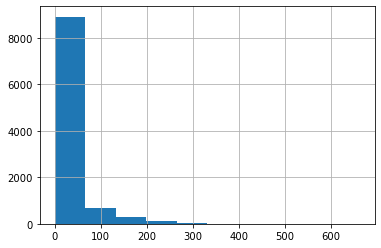

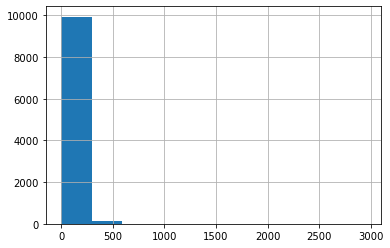

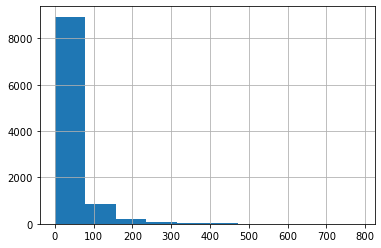

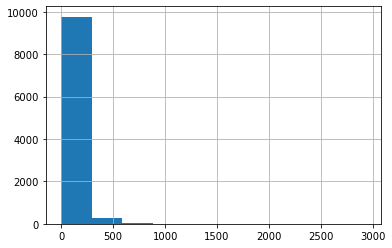

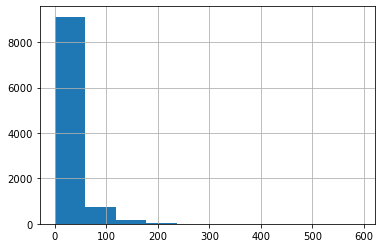

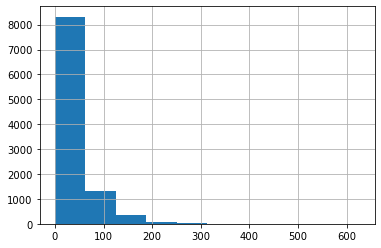

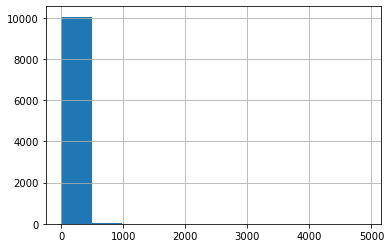

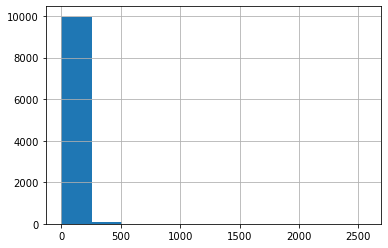

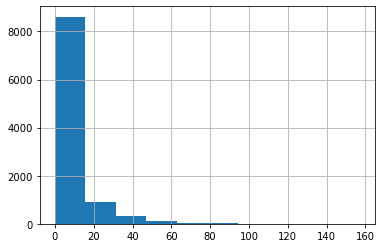

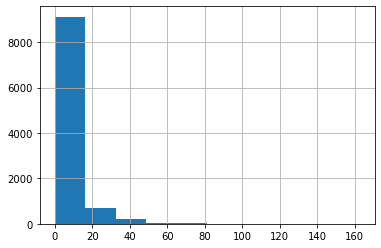

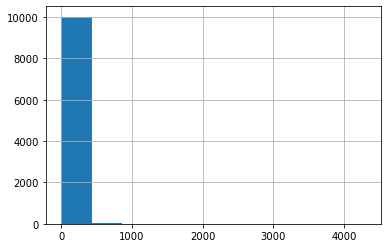

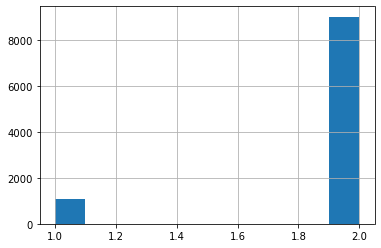

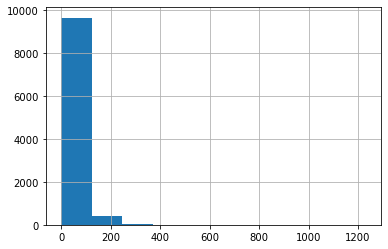

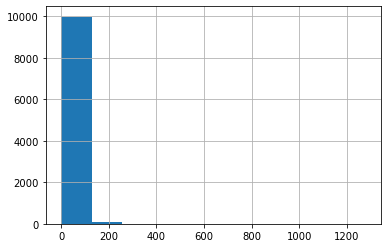

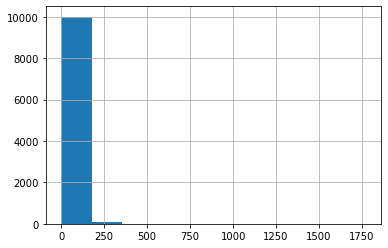

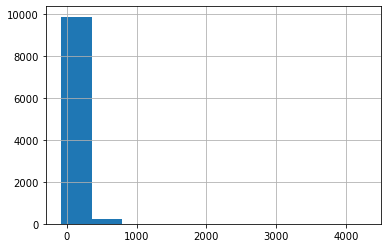

In [48]:
import matplotlib.pyplot as plt
for col in to_scale:
    cleaned_data[col].hist()
    plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale test
# scaler.fit_transform(cleaned_data[['Average Credit Card Transaction']])
for col in to_scale:
    cleaned_data[col] = scaler.fit_transform(cleaned_data[[col]])

In [50]:
cleaned_data

,REF_NO,self_employed,self_employed_partner,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,...,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,1,0,0,1972,0.224142,0.048429,0.000000,0.027969,0.000000,0.047889,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1998,0.000000,0.025402,0.000000,0.008869,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,1996,0.000000,0.056387,0.026745,0.099430,0.019423,0.266575,...,0,1,0,0,0,0,0,0,0,0
3,5,0,0,1997,0.000000,0.000000,0.000000,0.006992,0.000000,0.063011,...,0,0,0,0,0,0,0,0,0,1
4,6,0,0,1995,0.110908,0.019636,0.000000,0.060544,0.070977,0.063027,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,11512,0,0,1972,0.000000,0.000000,0.000000,0.010227,0.010981,0.000000,...,0,0,0,0,0,1,0,0,0,0
10182,11513,0,0,1988,0.000000,0.037588,0.000000,0.068390,0.000000,0.004775,...,0,0,0,0,0,1,0,0,0,0
10183,11514,0,0,1992,0.188642,0.000000,0.069417,0.000000,0.142833,0.000000,...,0,0,0,0,0,1,0,0,0,0
10184,11516,0,1,1970,0.000000,0.012189,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [51]:
cleaned_data['Revenue Grid'] # changed target variable from 1,2 to 0,1

Y = cleaned_data['Revenue Grid']
ref_col = cleaned_data['REF_NO']
cleaned_data.drop(['Revenue Grid', 'REF_NO'], inplace=True, axis=1)
X = cleaned_data

<AxesSubplot:>

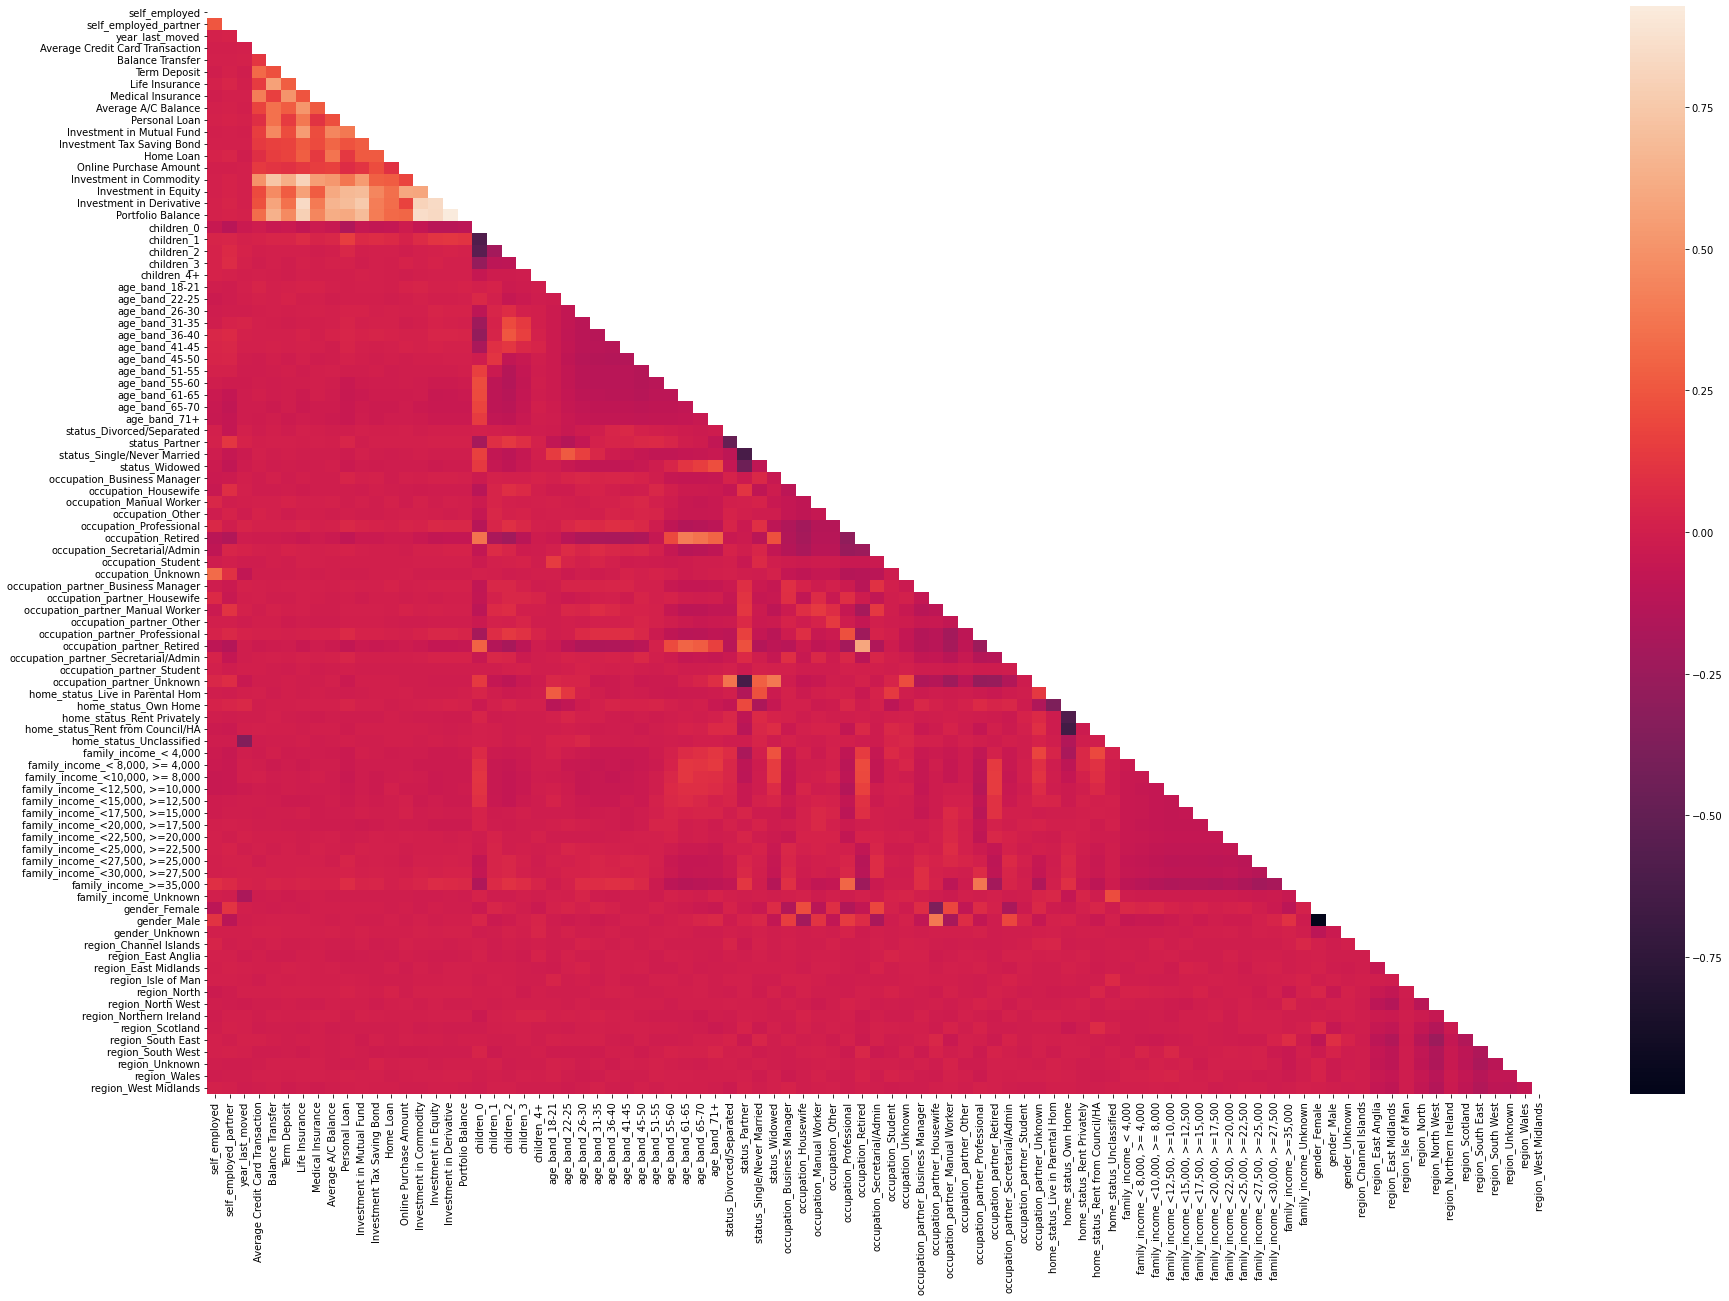

In [59]:
import seaborn as sns
correlation = cleaned_data.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(correlation, mask=mask)

In [52]:
X

,self_employed,self_employed_partner,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,...,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,0,0,1972,0.224142,0.048429,0.000000,0.027969,0.000000,0.047889,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1998,0.000000,0.025402,0.000000,0.008869,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1996,0.000000,0.056387,0.026745,0.099430,0.019423,0.266575,0.000000,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1997,0.000000,0.000000,0.000000,0.006992,0.000000,0.063011,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1995,0.110908,0.019636,0.000000,0.060544,0.070977,0.063027,0.002236,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,0,0,1972,0.000000,0.000000,0.000000,0.010227,0.010981,0.000000,0.001832,...,0,0,0,0,0,1,0,0,0,0
10182,0,0,1988,0.000000,0.037588,0.000000,0.068390,0.000000,0.004775,0.000000,...,0,0,0,0,0,1,0,0,0,0
10183,0,0,1992,0.188642,0.000000,0.069417,0.000000,0.142833,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
10184,0,1,1970,0.000000,0.012189,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [60]:
## get logistic regression model and train on part of the set
from sklearn.linear_model import LogisticRegression

# split PP data into 3 splits
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 69) # lmao

In [61]:
# define search parameters for grid search / random search
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import loguniform

model = LogisticRegression()
crossval = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=69)
# search space for L1 problem - testing params on full dataset
search_space = dict()
search_space['solver'] = ['saga', 'liblinear'] # l1 supported solvers from sklearn
search_space['penalty'] = ['l1']
search_space['C'] = loguniform(1e-5, 100)

# search definition
search = RandomizedSearchCV(model, search_space, n_iter=100, scoring='accuracy', n_jobs=-1, 
                            cv=crossval, random_state=69)
result = search.fit(X,Y)

# error thrown for 4+: value appears in children column - change all values to strings and OHE

In [62]:
print(result.best_score_, result.best_params_)

0.9439652256674059 {'C': 82.00452181929553, 'penalty': 'l1', 'solver': 'liblinear'}


In [63]:
result.best_params_['C']

82.00452181929553

In [64]:
# use best params to develop and test model with best params (incl. C param)
LogReg_L1 = LogisticRegression(solver=result.best_params_['solver'], penalty = 'l1',
                              C=result.best_params_['C'])
LogReg_L1.fit(X_train, Y_train)

LogisticRegression(C=82.00452181929553, penalty='l1', solver='liblinear')

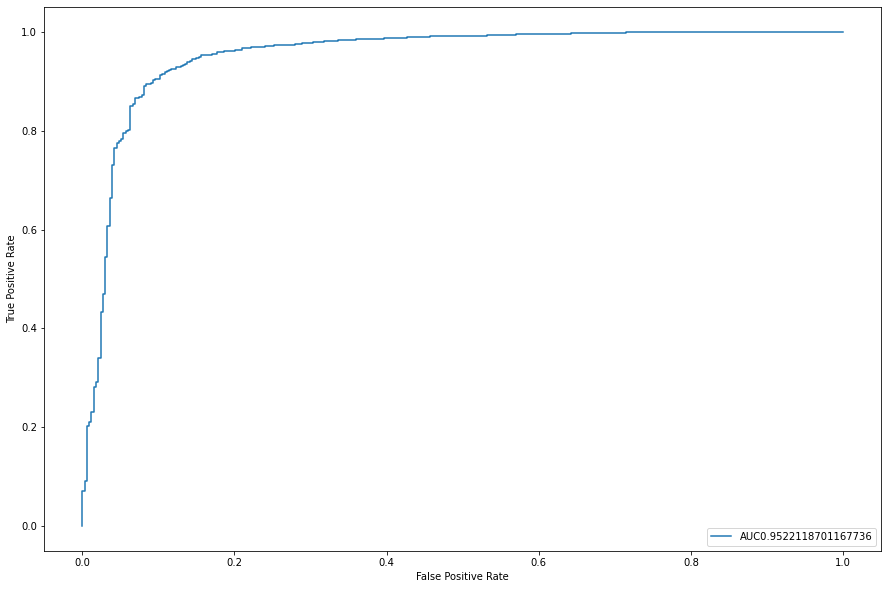

In [67]:
# ROC / AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = LogReg_L1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(fpr, tpr, label = 'AUC' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [69]:
# attempt prediction for classification report 
from sklearn.metrics import classification_report, confusion_matrix

Y_pred_LogRegL1 = LogReg_L1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_LogRegL1)

print(classification_report(Y_test, Y_pred_LogRegL1))
print(cm)

              precision    recall  f1-score   support

         0.0       0.83      0.65      0.73       333
         1.0       0.96      0.98      0.97      2692

    accuracy                           0.95      3025
   macro avg       0.90      0.81      0.85      3025
weighted avg       0.94      0.95      0.94      3025

[[ 215  118]
 [  43 2649]]
